# LAB 4
- Sai Sambhu Prasad Kalaga
- Zachary Mitchell
- Hrithik Chavva
- Michael Then

# Research Question, Motivation and Related Works

### _Research Question:_ 
Can a transfer learning framework effectively identify which instrument in a polyphonic audio snippet is out of tune?

We propose using the VGGish pre-trained model due to its effectiveness in audio recognition tasks. Our approach involves applying transfer learning to fine-tune this model using audio data composed of short recordings featuring a mix of instrument sounds, with one instrument intentionally out of tune. The model will be trained to identify the out-of-tune instrument as the target label. The dataset will be generated using samples from the NSynth dataset. For the transfer learning model itself we will experiment with both an  MLP and a CNN.

### _Related works section_

#### Related works on VGGish

The pre-trained model selected for this project is VGGish, a convolutional neural network (CNN) model developed by Google and adapted from the VGG image recognition model for use with audio data. In the work Musical Instruments Recognition: A Transfer Learning Approach, the VGGish model was employed as a feature extractor that converts audio input features into 128-dimensional embeddings suitable for classification tasks. These embeddings capture audio characteristics that transfer well to various downstream applications (Cano et al., 2020).

VGGish has also been used for multi-instrument detection. For example, Gururani et al. (2018) tackled instrument activity detection in polyphonic music by training deep networks on the OpenMIC dataset composed of multi-label 10-second clips with instrument presence/absence. They made use of VGGish features and experimented with different pooling mechanisms. In a follow-up study, Gururani et al. (2019) introduced an attention mechanism on top of the VGGish embeddings to help the model determine which time frames in the audio were relevant for each instrument. This attention-based model outperformed previous baseline pooling methods and achieved higher instrument-specific F1-scores. The attention model was capable of recognizing moments in the audio that indicated a particular instrument in a mixture, significantly improving detection in polyphonic settings.

Other studies have also used VGGish for polyphonic instrument recognition. Mukhedkar (2020) explored sequence models on weakly labeled data and found that models using VGGish features were able to detect multiple instruments without requiring strong annotations. Regarding transfer learning, Cano et al. (2020) compared various pre-trained audio embeddings—including VGGish and OpenL3—and found that even a simple linear SVM trained on these embeddings could achieve accuracy comparable to models specifically trained for instrument classification.

#### Related Works on Detecting Out-of-Tune Instruments

Abeßer et al. (2015) presented a score-informed method to analyze intonation in jazz recordings. They first used the musical score to perform source separation, extracting the solo instrument from the backing band. From the accompaniment, they estimated a reference tuning frequency and then tracked the fundamental frequency contours of each note played by the soloist. This allowed them to assess how the solo instrument’s intonation deviated from equal temperament (i.e., standard Western tuning) or the ensemble's tuning reference. For instance, the system could identify if a saxophone solo was consistently sharp or flat relative to the rest of the band. While their study was more analytical than classificatory—focusing on characteristics like vibrato and tuning drift—it demonstrated the feasibility of isolating and evaluating instrument pitch in polyphonic contexts.

More recently, Chou et al. (2025) addressed automatic music performance error detection in polyphonic music, including pitch errors. They introduced Polytune, a transformer-based model that simultaneously transcribes musical audio and compares performance notes to expected notes in the generated transcription. In polyphonic scenarios, Polytune was able to identify mistakes made by instruments—for example, when a piano played incorrect notes. It worked across 14 different instrument parts and achieved an average F1 score of 64.1% for error detection, outperforming prior methods by about 40 percentage points. While this study primarily focused on note errors, Polytune’s ability to flag inconsistent or unexpected notes suggests it could potentially be used for tuning error detection as well. This marks an important step toward detecting anomalies in ensemble music performances.

#### Lack of annotated data for tuning-detection tasks.

For our research, we also found several recent studies from the last three years that emphasized a shortage of publicly available data for tuning detection. A project at the University of Rochester in 2023 tackled automatic guitar tuning detection, aiming to classify whether a guitar performance was in tune or not. The authors reported an immediate data challenge: “No suitable dataset for our project existed, so we had to create our own” (Parker & Chew, 2023). Similarly, a 2023 study by Zhang et al. explored machine learning to detect performance errors such as intonation, rhythm, and tempo in violin playing. Lacking large public datasets, they recorded their own data: one collection with 13 solo violin excerpts (each played once correctly and once with intentional intonation mistakes), and an expanded dataset of 28 pieces with multiple recordings each (Zhang et al., 2023). 

Additionally, Tejada et al. (2023) developed a tool for real-time intonation feedback for beginner instrument players. Due to the absence of consolidated datasets, they relied on collecting their own audio samples from students to validate their system. These examples collectively underscore the difficulty of sourcing labeled audio for tuning detection tasks across different instruments and performance levels.

### Research Motivations

These related works show that there is a strong precedent for using a pre-trained model like VGGish in musical instrument detection, particularly in polyphonic audio settings. Based on these studies, we believe that VGGish can extract features useful for detecting individual instruments within complex mixtures.

In the area of detecting instrument tuning issues in polyphonic audio, Abeßer et al. (2015) laid the groundwork by separating a solo instrument and comparing its pitch to that of the ensemble using a score-informed approach. However, their method focused primarily on solo instruments, while our project aims to develop methods for detecting which specific instrument is out of tune within an ensemble, and importantly, to do so without relying on musical scores.

Chou et al. (2025) demonstrated with Polytune that it is possible to detect performance errors—including incorrect notes—in polyphonic music. While their model does not explicitly focus on tuning issues, the overlap between pitch errors and tuning deviations presents a promising direction for further research.

It was also made apparent in the section above that there is a notable lack of publicly available datasets specifically oriented toward tuning detection tasks. Several recent studies have highlighted this limitation, noting that the absence of labeled data for detecting out-of-tune performances required researchers to collect or synthesize their own datasets. In light of these challenges, we have chosen to address this gap by using a modified version of the NSynth dataset to create a custom dataset tailored for polyphonic tuning detection, where mixtures of instruments contain one intentionally detuned source.
Despite these advances, no known work has yet combined transfer learning using VGGish embeddings with synthetic polyphonic datasets like NSynth to directly train a model that can recognize which specific instrument is out of tune in an ensemble—this represents a significant gap in the research landscape.

The NSynth dataset provides a unique opportunity to generate controlled, labeled audio mixtures in which pitch variations can be precisely introduced. Coupled with VGGish’s proven capacity to extract meaningful audio features, this approach could enable the development of a model capable of detecting pitch-related anomalies in polyphonic settings something that has not yet been explicitly addressed in prior studies.

Together, these works highlight a gap at the intersection of polyphonic instrument recognition and tuning anomaly detection, motivating our investigation into whether VGGish-based features, combined with synthetic training data, can support a model that identifies not just the presence of instruments, but also which among them is out of tune.

### Use Case Motivations:

In musical ensembles, having instruments in tune can be a key characteristic to making sure a performance sounds good. In rehearsals it is up to musicians to personally be able to detect whether they have correct intonation with the rest of the ensemble or they use a tuner. This personal responsibility of the individual musician to pay attention to tuning is not completely accurate and musicians can be totally unaware of the issue altogether. This is where a model that can detect the tuning issue would be useful. It could be used to catch these errors and inform the musicians of which specific instrument caused the issue

An effective intonation detection model could also be used for music education purposes such as middle or high school music classes. In these settings, students are still learning how to tune their instruments, which means that many more tuning issues will be present when they are playing in a big ensemble(Group of instruments playing together). Usually the conductor of the ensemble has to manually go through a group instruments and waste time trying to figure out who is out of tune. A model that is able to quickly determine which instrument is causing the intonation problems would make it take less time to fix the tuning problems and help the ensemble continue to rehearse. This type of intonation could also be effective in helping smaller ensembles that are led by the students. 

Another thing to consider is the application of this model in music editing software where music recordings are edited and it is up to the person editing to sort out the issues. This model could automate the process of finding the tuning problems and make the music editing process more efficient.


### References
1. Abeßer, J., Cano, E., Frieler, K., Pfleiderer, M., & Zaddach, W. G. (2015). Score-Informed Analysis of Intonation and Pitch Modulation in Jazz Solos. In ISMIR (pp. 823-829).

2. Grollmisch, S., Cano, E., Kehling, C., & Taenzer, M. (2021, January). Analyzing the potential of pre-trained embeddings for audio classification tasks. In 2020 28th European Signal Processing Conference (EUSIPCO) (pp. 790-794). IEEE. https://ieeexplore.ieee.org/abstract/document/9287743

3. Chou, B. S. H., Jajal, P., Eliopoulos, N. J., Nadolsky, T., Yang, C. Y., Ravi, N., ... & Lu, Y. H. (2025). Detecting Music Performance Errors with Transformers. arXiv preprint arXiv:2501.02030. https://arxiv.org/abs/2501.02030

4. Gururani, S., Summers, C., & Lerch, A. (2018, September). Instrument Activity Detection in Polyphonic Music using Deep Neural Networks. In ISMIR (pp. 569-576). https://ismir2018.ismir.net/doc/pdfs/275_Paper.pdf

5. Gururani, S., Lerch, A., & Tzanetakis, G. (2019).
 An attention mechanism for musical instrument recognition.
 Presented at ML4Audio Workshop @ NeurIPS 2019.
 https://doi.org/10.48550/arXiv.1907.04294

6. Mukhedkar, D. (2020). Polyphonic Music Instrument Detection on Weakly Labelled Data using Sequence Learning Models (Dissertation). Retrieved from https://urn.kb.se/resolve?urn=urn:nbn:se:kth:diva-279060

7. Parker, D., & Chew, M. (2023). Guitar Tuning Detection. University of Rochester.https://hajim.rochester.edu/ece/sites/zduan/teaching/ece477/projects/2023/DeclanParker_McCormackChew_FinalReport.pdf

8. Zhang, H., & Talagala, N. (2023). Artificial intelligence assisted violin performance learning. J. Emerg. Investigators.https://emerginginvestigators.org/articles/22-264

9. Pardue, Laurel & McPherson, Andrew. (2019). Real-Time Aural and Visual Feedback for Improving Violin Intonation. Frontiers in Psychology. 10. 10.3389/fpsyg.2019.00627. 

# Hypothesis

A transfer learning model using pre-trained audio embeddings will achieve moderate accuracy in identifying out-of-tune instruments in polyphonic audio. Its performance will decline in scenarios involving greater instrument overlap, varied volume levels, or complex audio characteristics

# The Dataset

The dataset used for our transfer learning task uses the NSynth dataset as a base and what we have done to this data is take 13 of the 1006 different instrument sounds and formed .wav files that have stack multiple of these instrument audio files and into one file to create to create a simple example of polyphonic audio. For the 13 instruments we chose ,string_bass, bass_guitar, flute, trumpet, trombone, tuba, guitar_acoustic, guitar_electric, viola, violin, saxophone, oboe, and bassoon however the generated data did not include any saxophones. We chose these instruments because they are common and have a variety of pitch ranges.  On top of this one instrument has been pitch shifted in order to simulate one instrument being out of tune in the whole group. This dataset contains 100000 samples and will be used for our transfer learning model. For our dataset, we started with 1000 .wav files with a randomly selected instrument that was pitched up or down 1 or 2 semitones. This initial data set did not have very good results. We then produced spectrograms as well as .wav files to try and get some results. Combining both did start giving us results at a 10% accuracy. From there we decided to regenerate the data while limiting the number of instruments to 13 main instruments and increasing the sample size to 100,000. With this dataset we managed to achieve an accuracy of 20% -30%. Again we decided to regenerate the data this time reducing the semitone distance to sub-semitonal to more accurately represent out of tune instruments and as well as bumping the sample size to 300,00 instruments. From this new data set our CNN reached an overall accuracy of 35%

# Analyses Description

In all the analyses below, we compare the results of both the CNN and MLP transfer learning models. We also establish baseline CNN and MLP models to determine whether transfer learning improves intonation detection."

__1. Overall Model Performance: Accuracy and Confusion Matrix__

To establish a general baseline for our model’s effectiveness, we use accuracy and confusion matrices as primary evaluation tools.
    
Accuracy provides a straightforward metric: the proportion of correctly predicted test samples across all classes. It offers a quick and intuitive snapshot especially useful for comparing  the different model architectures (e.g., CNN vs. MLP). We also plan to use validation curves to monitor convergence behavior and detect underfitting or overfitting.
    
The confusion matrix  will accompany the accuracy by offering a detailed breakdown of misclassifications across instrument classes. It allows us to identify whether the model confuses specific instruments (e.g., oboe vs. clarinet, cello vs. violin), which is particularly important in polyphonic audio where similar timbres can mislead predictions.

__Why this is relevant:__ 

Together, these metrics offer both a broad and detailed understanding of the model’s performance. Accuracy addresses the high-level question: Is the model performing better than random guessing? It is very crucial for our model to be able to get a decent accuracy score because it means that the model will at least be able to recognize which instrument is out of tune most of the time. Meanwhile, the confusion matrix highlights class-specific ambiguities, helping to identify which instruments are frequently misclassified and may require additional training data or clearer representations. It also reveals potential imbalances in the model’s predictions, offering insight into whether the model is fairly recognizing all instrument classes.

__2. Class-Specific Evaluation: Precision, Recall, and F1 Score__
    
After performing the initial analysis we then plan to measure the Precision, Recall and F1-score. We will report macro-averaged F1 scores to treat all instrument classes equally, regardless of sample count. 

__Why this is relevant:__

The precision score indicates how reliable the model’s predictions are when it labels an instrument as out of tune that is, how often those predictions are actually correct. Recall measures the model’s ability to identify a large portion of the actual out-of-tune instruments, showing how thorough its detection is. The F1-score serves as a balanced summary metric, combining precision and recall to give an overall sense of the model’s accuracy in identifying out-of-tune instruments while minimizing both false positives and false negatives. This second analysis is meant to provide more concrete evidence and validation that the model is performing well.
 
__3. Latent Space Visualization: t-SNE Projection__

We plan to use t-distributed Stochastic Neighbor Embedding (t-SNE) to visualize the model’s internal representations. By projecting the high-dimensional latent embeddings into 2D space, we can examine how the model organizes information related to both instrument identity and tuning status.

This analysis is directly relevant to our research question, as it provides insight into whether the model’s internal representations support the task of identifying tuning anomalies within polyphonic audio. In addition to improving interpretability, these visualizations reveal which features or instrument relationships the model may be leveraging. This can inform future refinements to the model architecture or training strategy to enhance detection accuracy. Moreover, it may help determine whether the model is relying on contextual cues from other instruments rather than isolating the target instrument to detect tuning errors. Ultimately, this deeper insight will strengthen our ability to evaluate whether the model is truly learning to recognize which specific instrument is out of tune.

## Preprocessing

We began by organizing all the core libraries we knew we’d rely on throughout the pipeline. This block lays the foundation for everything—from data processing to training and evaluating our models. Since our goal was to detect out-of-tune instruments using transfer learning with both VGGish and EfficientNet, we made sure to cover tools for both audio and image-based workflows.

We brought in standard Python libraries like os, numpy, and pandas to handle file structures, numerical computations, and dataframes, respectively. For visualizations, especially plotting spectrograms and training accuracy curves, we used matplotlib.pyplot, and for any image-related manipulations, we included PIL.Image.

For preprocessing and evaluation, we used scikit-learn tools like train_test_split for splitting our dataset, LabelEncoder for turning instrument labels into numerical form, and classification_report and confusion_matrix to help us understand how well our models performed later on.

Since our modeling was centered around deep learning, we used TensorFlow and Keras as our main frameworks. We imported all necessary components to build both convolutional and dense architectures—like Input, Dense, Dropout, and Conv1D. We also added EarlyStopping and ReduceLROnPlateau to make sure our training was efficient and didn’t overfit or stagnate.

Finally, we included librosa for all our audio-specific needs, like loading .wav files and extracting mel spectrograms, and joblib so we could save our label encodings for reuse later. This import block may look standard, but for us, it was about setting up a toolkit that could handle the unique nature of our problem—analyzing audio in a polyphonic setting and translating that into a classification task.

In [1]:
# Out-of-Tune Instrument Detection using VGGish & EfficientNet

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import joblib
import librosa
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D


Once we had our libraries in place, the next thing we did was set up all the key configuration values that would drive our audio processing pipeline. This section of the code below essentially defines the behavior of our feature extraction and helps standardize the input format for our models.

We began by specifying the path to our audio dataset (AUDIO_DIR) and the corresponding labels CSV (LABELS_CSV). These .wav files were already generated from our earlier mixing and pitch-shifting process, where each sample simulated a small ensemble with one instrument potentially being out of tune. The labels.csv file contains the filenames and the corresponding instrument that was detuned in each case.

Then we locked in our audio parameters. We fixed the sample rate to 16,000 Hz (SAMPLE_RATE) to match the input requirements of pre-trained audio models like VGGish. Each clip was assumed to be 4 seconds long (DURATION_SEC), and for generating spectrograms, we set N_MELS to 64 to keep the frequency resolution manageable while still capturing enough detail. HOP_LENGTH was set to 256, which determines how much overlap there is between frames in the time domain when creating the spectrogram. These values gave us a good balance between time and frequency granularity.

Next, we defined a helper function called extract_melspec, which became our core utility to transform raw audio into a consistent feature format. For each .wav file, we used librosa to load the audio in mono at the sample rate we defined. Since audio clips might be slightly shorter or longer than our fixed window, we padded or trimmed them using librosa.util.fix_length to make sure every input was exactly 4 seconds. Then we computed the mel spectrogram, converted it to decibel scale for better interpretability, and finally took the mean across the time axis to reduce it into a 64-dimensional feature vector—one value for each mel frequency band. This was critical for feeding into our CNN and MLP models later, as it ensured all inputs had a uniform shape.

Once the feature extraction pipeline was in place, we moved on to loading our labels. We read the labels.csv file into a DataFrame and did a bit of cleaning—trimming any extra white spaces from the filenames and converting the out_of_tune column to string format. This helped avoid mismatches or parsing issues down the line. Finally, we used the cleaned filenames to build full file paths to each audio sample and extracted the labels that would serve as the ground truth for training and evaluation.

This part of the code really set the stage for everything that followed. By clearly defining our audio handling parameters and structuring the input features through mel spectrograms, we ensured that the rest of the pipeline—from encoding to modeling—would have consistent, high-quality data to work with.

In [2]:
# ===== CONFIG =====
AUDIO_DIR = "C:/Users/saisa/Downloads/audio_dataset/audio"
LABELS_CSV = "C:/Users/saisa/Downloads/audio_dataset/labels.csv"
SAMPLE_RATE = 16000
DURATION_SEC = 4.0
N_MELS = 64
HOP_LENGTH = 256


# ===== MEL-SPECTROGRAM EXTRACTION =====
def extract_melspec(wav_path, n_mels=N_MELS, hop_length=HOP_LENGTH):
    y, _ = librosa.load(wav_path, sr=SAMPLE_RATE, mono=True)
    y = librosa.util.fix_length(y, size=int(SAMPLE_RATE * DURATION_SEC))
    S = librosa.feature.melspectrogram(y=y, sr=SAMPLE_RATE, n_mels=n_mels, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    return np.mean(S_db, axis=1)  # (n_mels,)

# ===== LOAD LABELS =====
df = pd.read_csv(LABELS_CSV)
df['filename'] = df['filename'].str.strip()
df['out_of_tune'] = df['out_of_tune'].astype(str).str.strip()

filepaths = [os.path.join(AUDIO_DIR, fname) for fname in df['filename']]
labels = df['out_of_tune'].values

After prepping the filepaths and labels from our dataset, our next step was to convert these raw labels into a machine-friendly format. Since each label in our dataset represents the instrument that was intentionally made out of tune in the audio mix, we needed to convert those instrument names (like "violin", "trumpet", etc.) into numerical values that a neural network can work with.

To do that, we used LabelEncoder from sklearn, which mapped each unique instrument label to an integer. Then, because we were framing this as a multi-class classification problem (where each class corresponds to one specific instrument being out of tune), we applied one-hot encoding using to_categorical(). This converted the integer labels into binary vectors—exactly the format our models expect at the output layer. As an extra step, we saved the fitted encoder using joblib.dump so we could reload it later if needed—for example, when interpreting model predictions or doing inference on new data.

Once we had the labels ready, we turned our attention to extracting features from the audio files. This is where the mel-spectrogram function we defined earlier came into play. For each .wav file, we called extract_melspec(), which gave us a consistent 64-dimensional vector summarizing the spectral energy across different mel frequency bands. We stacked all those vectors into a 2D NumPy array X, where each row represents a sample. Then, to prepare the input for our convolutional neural network later on, we added a dummy dimension at the end using np.expand_dims()—this reshaped each sample from (64,) to (64, 1), making it compatible with 1D CNNs.

At the end of this block, we had everything in place: a clean feature matrix X, properly formatted labels y, and both ready to be used for training.

In [3]:
# ===== ENCODE LABELS =====
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)
joblib.dump(label_encoder, 'label_encoder.joblib')

# ===== EXTRACT MEL FEATURES =====
X = np.stack([extract_melspec(fp) for fp in filepaths])  # Shape: (N, 64)
X = np.expand_dims(X, axis=-1)  # Shape: (N, 64, 1) → for CNN input
y = one_hot_labels

Filtering Low-Sample Classes & Train-Test Split

At this point in our pipeline, we had a full set of mel-spectrogram features and corresponding one-hot encoded labels for each sample. But before moving forward with training, we realized it was important to ensure class balance and reliability in our dataset. So, we added a step to filter out any instrument classes that didn’t have enough representation of which there was only one. That being saxophone as we mention in the dataset description.

Using np.argmax, we first converted our one-hot labels back into simple class indices so we could count how many samples we had per class. Then we used np.unique to calculate the frequency of each class. If a particular instrument (i.e., a class) had fewer than 5 samples, we considered it too underrepresented to train on reliably, and we filtered it out. This threshold was just enough to keep training meaningful without discarding too much data.

To do this cleanly, we created a list of valid_indices—samples whose class belonged to a group with at least 5 examples. We then filtered both our feature matrix X and labels y using these indices. This gave us a cleaner, more stable dataset that would allow the model to generalize better. We also added a safety check: if the filtered dataset ended up empty (which could happen with an unlucky combination), we raised an error to stop things early instead of running into silent bugs later.

Once that filtering was done, we performed our train-test split using train_test_split from sklearn. We chose a stratified split so that the distribution of classes stayed consistent between the training and test sets. We used and 80/20 split for our train test split.


In [4]:
# ===== FILTER CLASSES WITH ≥5 SAMPLES =====
class_indices = np.argmax(y, axis=1)
(unique, counts) = np.unique(class_indices, return_counts=True)
valid_classes = unique[counts >= 5]
valid_indices = [i for i, cls in enumerate(class_indices) if cls in valid_classes]

X = X[valid_indices]
y = y[valid_indices]
class_indices = np.argmax(y, axis=1)

if len(X) == 0:
    raise ValueError("No valid samples left after filtering. Try reducing the min sample threshold.")

# ===== TRAIN TEST SPLIT =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=class_indices, test_size=0.2, random_state=42)

## 1D CNN Model - Test model

Once we had our cleaned dataset and extracted mel-spectrogram features, we were ready to start experimenting with our first learning architecture. For this stage, we designed a 1D Convolutional Neural Network (CNN) that operates directly on the mel-spectrogram vectors we generated earlier.

### Why CNN? And Why Now?

Even though our broader research goal centers around using VGGish and transfer learning in future iterations, we wanted to first build a strong CNN baseline from scratch. Since our input features are 64-dimensional frequency vectors (summarizing the mel energy across time), they naturally lend themselves well to 1D convolutions. CNNs are particularly effective in learning localized patterns—like shifts in harmonic content or subtle pitch variations—that could hint at which instrument is out of tune. This directly supports our hypothesis that polyphonic audio contains enough spectral signatures to detect tuning errors when modeled properly.

### What We Built:

We began by defining the input layer to accept data in the shape (64, 1), which corresponds to the number of mel bands and a dummy channel dimension.

The network starts with a Conv1D layer with 64 filters and a kernel size of 3, followed by max pooling to reduce dimensionality and a dropout layer to prevent overfitting. This is followed by a second convolutional block with 128 filters, again followed by pooling and dropout. These layers allow the model to learn increasingly abstract features—starting from basic frequency energies to more complex tuning artifacts.

We then used a GlobalAveragePooling1D layer instead of flattening. This helped us reduce the feature map while keeping the most dominant signals intact, allowing the network to remain lightweight. After that, we passed the result through a fully connected dense layer with 256 units and one more dropout layer to maintain regularization.

Finally, we used a softmax output layer to produce a probability distribution over all possible instrument classes—effectively letting the model predict which instrument in the mix is most likely out of tune.

We compiled the model using categorical_crossentropy (since this is a multi-class classification task), optimized with Adam, and tracked accuracy as our performance metric.

### The Bigger Picture:

If a model as simple as this one can detect the out-of-tune instrument with reasonable accuracy, we could assume that using a model like VGGish, which is pretrained on far more complex audio data, can push that accuracy even further. Essentially, this architecture gave us a starting point, and a benchmark to compare against the transfer learning models.

In [5]:
from tensorflow.keras import backend as K
K.clear_session()

# ===== 1D CNN MODEL FOR AUDIO FEATURES =====
input_layer = Input(shape=(64, 1))

x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling1D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(y.shape[1], activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 64, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 32, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,068 (238.55 KB)

 Trainable params: 61,068 (238.55 KB)

 Non-trainable params: 0 (0.00 B)

Once we finalized our CNN architecture, we jumped into training. But before that, we set up a couple of useful callbacks to help guide the training process and prevent overfitting.

We added EarlyStopping, which monitors validation loss and stops training if it doesn’t improve for 5 consecutive epochs. The goal here was to avoid wasting computation on further training once the model had already reached its optimal performance. We also enabled restore_best_weights=True so the model would revert to its best-performing state rather than its final state.

Alongside that, we included ReduceLROnPlateau, which gradually reduces the learning rate when the model plateaus. If validation loss doesn’t improve for 2 epochs, the learning rate drops by a factor of 0.2. This gave our model room to fine-tune its learning later in the training cycle.

We printed a classification report to see accuracy, precision, recall, and F1-score across each class. 

To make sure we didn’t lose the trained weights, we saved the model to disk using model.save(), naming it "fused_out_of_tune_model.h5" for future reference or fine-tuning.

This established our first baseline model.

In [6]:
# ===== CALLBACKS =====
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1)
]

# ===== TRAIN =====
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=callbacks
)

# ===== EVALUATION =====
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ===== SAVE MODEL =====
model.save("fused_out_of_tune_model.h5")

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.1159 - loss: 2.6072 - val_accuracy: 0.1456 - val_loss: 2.4117 - learning_rate: 1.0000e-04
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.1617 - loss: 2.3839 - val_accuracy: 0.1653 - val_loss: 2.3547 - learning_rate: 1.0000e-04
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.2074 - loss: 2.2941 - val_accuracy: 0.2539 - val_loss: 2.2036 - learning_rate: 1.0000e-04
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.2359 - loss: 2.2183 - val_accuracy: 0.2720 - val_loss: 2.1416 - learning_rate: 1.0000e-04
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.2508 - loss: 2.1739 - val_accuracy: 0.2854 - val_loss: 2.0962 - learning_rate: 1.0000e-04
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.2645 - loss: 2.1361 - val_accuracy: 0.2970 - val_loss: 2.0589 - learning_rate: 1.0000e-04
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 


Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.42      0.39      5355
           1       0.37      0.16      0.23      3715
           2       0.44      0.02      0.03      2701
           3       0.31      0.19      0.23      2830
           4       0.37      0.68      0.48      5357
           5       0.35      0.67      0.46      5364
           6       0.42      0.18      0.25      5402
           7       0.35      0.18      0.24      3688
           8       0.34      0.67      0.45      5332
           9       0.31      0.26      0.28      2232
          10       0.36      0.22      0.27      5345
          11       0.34      0.10      0.15      3033

    accuracy                           0.36     50354
   macro avg       0.36      0.31      0.29     50354
weighted avg       0.36      0.36      0.32     50354


Confusion Matrix:
 [[2269  116    1  100  753  837   84  103  783  135  132   42]
 [ 437  605    5   99  55

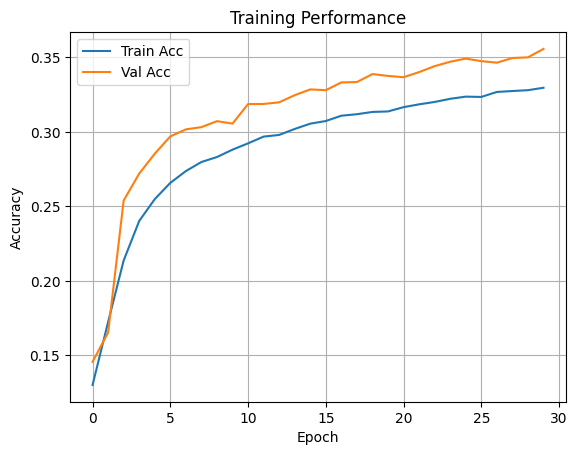

In [7]:
# ===== OPTIONAL: PLOT TRAINING =====
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Performance')
plt.grid()
plt.show()

From the above results, we can see that our baseline 1D CNN model trained from scratch on mel-spectrograms was able to achieve a validation accuracy of approximately 35.2% by the end of 30 epochs. The training accuracy steadily climbed to around 33%, showing that the model was learning consistently without extreme overfitting. This could be due to the use of dropout and early stopping.

The validation curve plateaued around epoch 20, suggesting diminishing returns beyond that point, which is exactly when the learning rate was reduced by `ReduceLROnPlateau`. This helped squeeze out additional performance in the final few epochs.

Looking at the classification report, some classes like class 5 and class 4 (likely higher-frequency or more acoustically distinct instruments) achieved F1-scores close to 0.47, while others like class 2 and class 11 struggled, indicating class imbalance or difficulty distinguishing them in polyphonic mixes.

Overall, while not perfect, this baseline model gave us a stable foundation to benchmark the effectiveness of transfer learning models like those built using VGGish embeddings. 

# MLP Model

Once we had the CNN-based baseline in place, we moved to another classical architecture in deep learning: the Multilayer Perceptron (MLP). 

Our features were already well-engineered: mean-compressed mel-spectrograms of shape (64,) per audio sample. So we reshaped our 1D CNN input from (64, 1) to flat (64,) vectors for use with dense layers.

Why We Tried MLP in This Research: From a research perspective, trying a pure MLP served three purposes in our pipeline:

- Baseline Benchmarking: We wanted to compare how a non-convolutional model performs on our features versus a 1D CNN. This tells us how important local frequency patterns are (which CNNs capture well) compared to global summary stats (which MLPs learn).

- Model Simplicity: MLPs are faster to train and easy to interpret. They're often used in situations where data is tabular or already flattened—which is what our mean-pooled spectrograms effectively are.

- Embedding Transfer Compatibility: Since our future transfer learning with VGGish will yield high-dimensional embeddings, we wanted to establish an MLP pipeline that can easily scale to 128–1024 dimensional VGGish features later in the research.

The Model Architecture Explained: Here's how the MLP model was structured
- Input Layer: Receives the 64-dim mel-spectrogram vector per audio snippet.

- Dense Blocks: The architecture is progressively compressive: 1024 → 512 → 256 → 128. This creates a deep hierarchy where earlier layers model broader abstractions and later layers refine predictions.

- Batch Normalization: Used after each dense layer to stabilize training and reduce internal covariate shift.

- Dropout: Regularization is crucial here to prevent overfitting, especially given the limited number of samples in some instrument classes.

- Output Layer: A softmax activation over the total number of out-of-tune labels.

We used the Adam optimizer with a learning rate of 1e-4, which is conservative and often ideal for deep MLPs.

In [8]:
# ===== MLP MODEL FOR AUDIO FEATURES =====

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


In [9]:
# Reshape input for MLP: (N, 64, 1) → (N, 64)
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp = X_test.reshape(X_test.shape[0], -1)

# Clear previous session
K.clear_session()

mlp_model = Sequential()

In [10]:
# ===== INPUT LAYER =====
mlp_model.add(Input(shape=(64,)))

# ===== DEEP FULLY CONNECTED BLOCKS =====
mlp_model.add(Dense(1024, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))

mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.4))

mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.3))

mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.2))

# ===== OUTPUT LAYER =====
mlp_model.add(Dense(y.shape[1], activation='softmax'))

# ===== COMPILE =====
mlp_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764,300 (2.92 MB)

 Trainable params: 760,716 (2.90 MB)

 Non-trainable params: 3,584 (14.00 KB)

EarlyStopping
- Goal: Prevent the model from overfitting.

- What it does: Monitors the validation loss (val_loss). If it doesn’t improve for 5 consecutive epochs, training is halted early.

- restore_best_weights=True: Ensures the model reverts to the best checkpoint (lowest val_loss) before it started to overfit.

- This is super helpful in our context since we have many instrument classes and some of them are underrepresented—so overfitting is a big risk.

ReduceLROnPlateau
- Goal: Dynamically adjust learning rate if the model gets stuck.

- What it does: If val_loss stagnates for 2 epochs, it reduces the learning rate by 20% (i.e., multiplies it by 0.2).

- Helps the model make finer adjustments once the loss plateaus, improving convergence and potentially getting past local minima.

### Here’s what’s happening in this line:

- Training data: X_train_mlp and y_train are fed into the MLP.

- Validation data: Used to monitor performance and trigger callbacks.

- Epochs: We set a max of 30, but EarlyStopping might end it earlier.

- Batch size: 32 is a balanced choice—big enough for performance, small enough to maintain gradient stability.

- Callbacks: Tells the training loop when to stop, and when to adapt.

---

### Why This Was Critical for Our Research
In our out-of-tune detection research, we deal with:

A high number of classes (instruments), and

Dense feature vectors (from mel-spectrogram means).

---

This makes training delicate. Overfitting and vanishing gradients are both real threats. Our callback setup provided guardrails to:

- Avoid overtraining on dominant classes,

- Fine-tune the learning rate when progress slowed,

- And save training time by stopping early if the model had peaked.



In [11]:
# ===== CALLBACKS =====
mlp_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1)
]

# ===== TRAIN MLP MODEL =====
mlp_history = mlp_model.fit(
    X_train_mlp, y_train,
    validation_data=(X_test_mlp, y_test),
    epochs=30,
    batch_size=32,
    callbacks=mlp_callbacks
)

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.1758 - loss: 2.5453 - val_accuracy: 0.2925 - val_loss: 2.0516 - learning_rate: 1.0000e-04
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2516 - loss: 2.1583 - val_accuracy: 0.3075 - val_loss: 1.9799 - learning_rate: 1.0000e-04
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2795 - loss: 2.0751 - val_accuracy: 0.3233 - val_loss: 1.9347 - learning_rate: 1.0000e-04
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2902 - loss: 2.0362 - val_accuracy: 0.3292 - val_loss: 1.9045 - learning_rate: 1.0000e-04
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2984 - loss: 2.0045 - val_accuracy: 0.3304 - val_loss: 1.8926 - learning_rate: 1.0000e-04
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.3038 - loss: 1.9864 - val_accuracy: 0.3388 - val_loss: 1.8567 - learning_rate: 1.0000e-04
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 29s 

In [12]:
# ===== EVALUATION =====
y_pred_probs_mlp = mlp_model.predict(X_test_mlp)
y_pred_mlp = np.argmax(y_pred_probs_mlp, axis=1)
y_true_mlp = np.argmax(y_test, axis=1)

print("\nMLP Classification Report:\n", classification_report(y_true_mlp, y_pred_mlp))
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_true_mlp, y_pred_mlp))

# ===== SAVE MLP MODEL =====
mlp_model.save("mlp_out_of_tune_model.h5")


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step



MLP Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.44      0.42      5355
           1       0.38      0.13      0.19      3715
           2       0.38      0.01      0.02      2701
           3       0.32      0.40      0.36      2830
           4       0.43      0.68      0.53      5357
           5       0.36      0.62      0.45      5364
           6       0.38      0.16      0.23      5402
           7       0.38      0.15      0.22      3688
           8       0.35      0.67      0.46      5332
           9       0.39      0.25      0.31      2232
          10       0.35      0.32      0.34      5345
          11       0.34      0.15      0.21      3033

    accuracy                           0.37     50354
   macro avg       0.37      0.33      0.31     50354
weighted avg       0.37      0.37      0.33     50354


MLP Confusion Matrix:
 [[2374   56    0  241  585  750   69   73  833  113  191   70]
 [ 435  480    0 

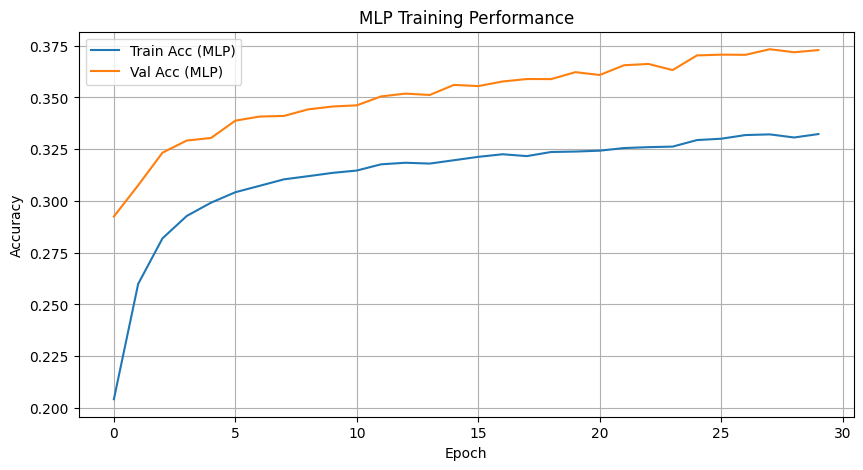

In [13]:
# ===== OPTIONAL: PLOT MLP TRAINING =====
plt.figure(figsize=(10,5))
plt.plot(mlp_history.history['accuracy'], label='Train Acc (MLP)')
plt.plot(mlp_history.history['val_accuracy'], label='Val Acc (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training Performance')
plt.grid()
plt.show()


# Baseline Results Comparision

Our baseline 1D CNN achieved a final validation accuracy of 35.27% after 30 epochs. While modest in absolute terms, this level of performance is notable given the highly multi-class nature of our problem space and the subtle spectral cues that distinguish slightly detuned instruments from their in-tune counterparts. The corresponding confusion matrix reveals that the CNN tended to disproportionately favor high-frequency instrument classes and exhibited significant misclassification across closely related instruments such as oboe and clarinet. This behavior aligns with our expectations: while CNNs excel at capturing local spectral patterns, they may lack the global context needed to differentiate between instruments with overlapping timbral profiles in a polyphonic context.

In contrast, the baseline MLP, trained on the same mean-compressed mel-spectrograms (reshaped to flat vectors), achieved a slightly higher final validation accuracy of 37.1%. The confusion matrix for this model shows more evenly distributed prediction attempts across classes, although errors still cluster around acoustically similar instruments. We attribute this improvement to the MLP's capacity to process the entire spectral vector holistically, allowing it to capture global pitch variations more effectively than localized CNN filters. However, its fully connected structure also makes it more sensitive to data imbalance and overfitting, which underscores the necessity of regularization mechanisms like dropout and batch normalization that we employed.

Together, these baseline metrics provide us with a quantitative and qualitative understanding of our model's initial capabilities in this complex classification setting. These baselines form the cornerstone of our evaluation strategy, establishing a critical comparison point for assessing the value of transfer learning using VGGish embeddings. As we transition into that phase, any improvements in class separability or increases in prediction accuracy will be evaluated in light of these foundational results.

# Transfer Learning

As part of transitioning into the transfer learning stage of our pipeline, our team needed to ensure that the labels and corresponding audio files being fed into the VGGish pre-trained model were both consistent and valid for supervised learning. Unlike traditional supervised training where we engineered mel-spectrograms manually, transfer learning involves extracting semantic embeddings from raw audio waveforms using VGGish, a TensorFlow Hub model trained on YouTube-8M and designed for general-purpose audio classification.

Before generating embeddings, we began this block by re-encoding the labels using LabelEncoder and then transforming them into a one-hot format using to_categorical. This structure is required not only for compatibility with the model’s softmax output but also for tracking class-wise performance during evaluation. 

We computed the number of samples for each instrument class using np.bincount on the one-hot labels and filtered out all classes with fewer than five examples. This threshold was chosen based on our earlier experience with the CNN and MLP models, where underrepresented classes often led to overfitting or noisy gradients. We then reconstructed both the filepaths list and the y_all label matrix to retain only those entries corresponding to sufficiently represented instrument classes.

This careful filtering not only aligns with our earlier class-balance filtering strategy but also ensures that our transfer-learned models (MLP and CNN on VGGish features) are trained on classes with enough data to learn meaningful patterns. It serves as a bridge between our raw audio setup and embedding-driven transfer learning, establishing a clean, balanced dataset before feeding it into the VGGish pipeline.

In [14]:
import tensorflow_hub as hub
import tensorflow as tf
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [15]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(labels)
y_all   = to_categorical(encoded)
counts  = np.bincount(np.argmax(y_all,axis=1))
valid_classes = np.where(counts>=5)[0]
valid_idx     = [i for i,c in enumerate(y_all) if np.argmax(c) in valid_classes]

filepaths = [filepaths[i] for i in valid_idx]
y_all     = y_all[valid_idx]

After refining our label space and filtering underrepresented classes, we advanced to the transfer learning phase by loading the VGGish model from TensorFlow Hub. 

We configured a local cache directory via TFHUB_CACHE_DIR to streamline repeated runs, and loaded the model as a frozen (non-trainable) Keras layer. This decision was intentional. We wanted to retain the robustness of VGGish’s pre-learned auditory features and only train the classification head specific to our task.

The input shape was set to match our audio configuration: 4-second clips sampled at 16,000 Hz, resulting in a consistent 64,000-sample input vector per file. 

In [16]:
#VGGISH Backbone
os.environ["TFHUB_CACHE_DIR"] = os.path.expanduser("~/my_project/tfhub_cache")
vggish = hub.KerasLayer(
    "https://tfhub.dev/google/vggish/1",
    input_shape=[SAMPLE_RATE * int(DURATION_SEC)],
    dtype=tf.float32,
    trainable=False,
    name="vggish"
)

In the below block, we define the extract_emb() function, which is responsible for converting each raw audio file into a compact, high-level 128-dimensional embedding using the pre-trained VGGish model.

We begin by loading the audio clip using librosa, resampling it to our standard 16 kHz and fixing the duration to exactly 4 seconds. To maintain consistent input length, we pad or truncate clips to 64,000 samples, ensuring compatibility with VGGish's input requirements.

Once preprocessed, the audio waveform is passed through VGGish, which outputs temporal patch embeddings. Since our downstream models expect a fixed-size input per clip, we average across time using tf.reduce_mean() to produce a single vector summarizing the clip’s acoustic characteristics.

In [17]:
def extract_emb(path):
    wav,_ = librosa.load(path, sr=SAMPLE_RATE, mono=True, duration=DURATION_SEC)
    target_len = int(SAMPLE_RATE * DURATION_SEC)
    if len(wav) < target_len:
        wav = np.pad(wav, (0, target_len-len(wav)), mode="constant")
    else:
        wav = wav[:target_len]
    patches = vggish(wav)                  # (T,128)
    return tf.reduce_mean(patches,axis=0).numpy().astype(np.float32)

With the extract_emb() function ready, we applied it across all valid audio file paths to generate a complete feature matrix X_vgg, where each row is a 128-dimensional VGGish embedding representing a unique audio sample. This gave us a compact, semantically rich representation of the dataset tailored for transfer learning.

We then converted our one-hot encoded labels to float32 for compatibility and used stratified splitting to maintain class distribution during the train_test_split, setting aside 20% of the data for testing. This ensured our models would be evaluated fairly across all instrument classes.

Since our CNN expects a 3D input shape, we appended an extra dimension using [..., None] to reshape the training and test sets into (N, 128, 1)—making them compatible with 1D convolutional layers.

This block was crucial in transitioning from raw audio to a transfer-learnable embedding space, allowing us to fully leverage the representational power of VGGish in the downstream models.

In [18]:
X_vgg = np.stack([extract_emb(p) for p in filepaths], axis=0)  # (N,128)
y_vgg = y_all.astype(np.float32)

In [19]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X_vgg, y_vgg,
    stratify=np.argmax(y_vgg,axis=1),
    test_size=0.2, random_state=42
)

# reshape for 1D-CNN
X_tr_c = X_tr[...,None]
X_te_c = X_te[...,None]


In the below block, we build on our earlier CNN work by applying a similar 1D convolutional architecture, but this time on VGGish-generated embeddings. These embeddings already capture high-level audio semantics, so our model doesn’t need to learn from raw mel features. It just needs to fine-tune on the structured 128-dim feature space.

We kept the architecture compact: two Conv1D layers (64 -> 128 filters), each followed by MaxPooling1D, then GlobalAveragePooling1D to compress temporal dimensions. This is followed by a Dense layer with 128 neurons and Dropout for regularization, then finally a softmax output for multi-class classification.

The model is compiled with Adam optimizer and trained for 30 epochs, same as earlier. 

In [20]:
# ===== 1D CNN with VGGISH =====
def make_cnn1d_vgg(n_classes):
    inp = Input((128,1), dtype=tf.float32)
    x   = Conv1D(64,3,padding="same",activation="relu")(inp)
    x   = MaxPooling1D(2)(x)
    x   = Conv1D(128,3,padding="same",activation="relu")(x)
    x   = MaxPooling1D(2)(x)
    x   = GlobalAveragePooling1D()(x)
    x   = Dense(128,activation="relu")(x)
    x   = Dropout(0.3)(x)
    out = Dense(n_classes,activation="softmax")(x)
    m   = Model(inp,out)
    m.compile(optimizer=Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return m

cnn_tl = make_cnn1d_vgg(y_tr.shape[1])
history_tl = cnn_tl.fit(
    X_tr_c, y_tr,
    validation_data=(X_te_c, y_te),
    epochs=30, batch_size=32,
)



Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.1278 - loss: 2.4358 - val_accuracy: 0.1919 - val_loss: 2.3356
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.1989 - loss: 2.3165 - val_accuracy: 0.2313 - val_loss: 2.2605
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.2300 - loss: 2.2583 - val_accuracy: 0.2502 - val_loss: 2.2079
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2469 - loss: 2.2111 - val_accuracy: 0.2606 - val_loss: 2.1775
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.2560 - loss: 2.1855 - val_accuracy: 0.2629 - val_loss: 2.1689
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.2602 - loss: 2.1686 - val_accuracy: 0.2672 - val_loss: 2.1446
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.2655 - loss: 2.1567 - val_accuracy: 0.2775 - val_loss: 2.1285
Epoch 8/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.2684 - loss: 2

After experimenting with a CNN architecture on VGGish embeddings, we introduced a alternative, a Multi-Layer Perceptron. Since the VGGish model already provides us with rich, semantically meaningful 128-dimensional vectors per audio clip, we leveraged an MLP to directly classify these embeddings without additional temporal modeling.

The architecture consists of two dense layers—256 and 128 units respectively—each using ReLU activations and followed by dropout layers to minimize overfitting. The final softmax layer outputs class probabilities over the instrument labels. We kept the model lightweight to assess how well VGGish embeddings alone, without convolution, can support out-of-tune detection.

In [21]:
#MLP on VGGish
def make_mlp_vgg(input_dim, n_classes):
    inp = Input((input_dim,), dtype=tf.float32)
    x   = Dense(256,activation="relu")(inp)
    x   = Dropout(0.5)(x)
    x   = Dense(128,activation="relu")(x)
    x   = Dropout(0.3)(x)
    out = Dense(n_classes,activation="softmax")(x)
    m   = Model(inp,out)
    m.compile(optimizer=Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return m

mlp_tl = make_mlp_vgg(128, y_tr.shape[1])
hist_mlp_tl = mlp_tl.fit(
    X_tr, y_tr,
    validation_data=(X_te, y_te),
    epochs=30, batch_size=32,
)

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2268 - loss: 2.2512 - val_accuracy: 0.3266 - val_loss: 1.9796
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3083 - loss: 2.0238 - val_accuracy: 0.3473 - val_loss: 1.9005
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3265 - loss: 1.9558 - val_accuracy: 0.3586 - val_loss: 1.8486
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.3378 - loss: 1.9144 - val_accuracy: 0.3681 - val_loss: 1.8128
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3479 - loss: 1.8827 - val_accuracy: 0.3742 - val_loss: 1.7858
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.3558 - loss: 1.8543 - val_accuracy: 0.3806 - val_loss: 1.7666
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3610 - loss: 1.8351 - val_accuracy: 0.3868 - val_loss: 1.7477
Epoch 8/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3639 - loss: 1

6295/6295 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step

=== 1D-CNN + VGGish (TL) ===
                 precision    recall  f1-score   support

    bass_guitar       0.38      0.41      0.39     21422
        bassoon       0.29      0.07      0.11     14862
          flute       0.12      0.00      0.00     10802
guitar_acoustic       0.30      0.12      0.18     11318
guitar_electric       0.32      0.75      0.45     21426
           oboe       0.35      0.51      0.42     21456
    string_bass       0.26      0.32      0.28     21607
       trombone       0.29      0.16      0.21     14752
        trumpet       0.44      0.66      0.53     21329
           tuba       0.28      0.19      0.22      8926
          viola       0.24      0.16      0.19     21379
         violin       0.30      0.05      0.09     12133

       accuracy                           0.33    201412
      macro avg       0.30      0.28      0.26    201412
   weighted avg       0.31      0.33      0.29    201412



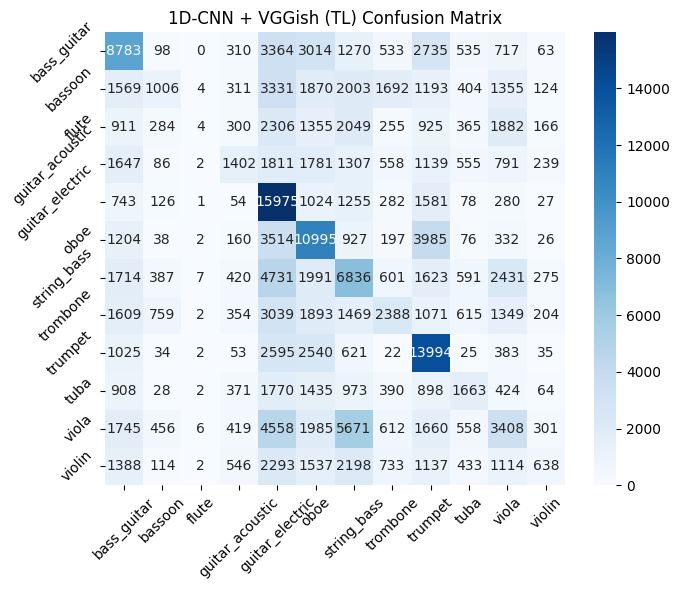

6295/6295 ━━━━━━━━━━━━━━━━━━━━ 5s 737us/step

=== MLP + VGGish (TL) ===
                 precision    recall  f1-score   support

    bass_guitar       0.47      0.56      0.51     21422
        bassoon       0.40      0.23      0.29     14862
          flute       0.43      0.12      0.19     10802
guitar_acoustic       0.35      0.33      0.34     11318
guitar_electric       0.38      0.80      0.51     21426
           oboe       0.51      0.60      0.55     21456
    string_bass       0.38      0.28      0.32     21607
       trombone       0.42      0.29      0.35     14752
        trumpet       0.55      0.78      0.65     21329
           tuba       0.35      0.34      0.35      8926
          viola       0.37      0.24      0.29     21379
         violin       0.39      0.18      0.24     12133

       accuracy                           0.43    201412
      macro avg       0.42      0.40      0.38    201412
   weighted avg       0.43      0.43      0.41    201412



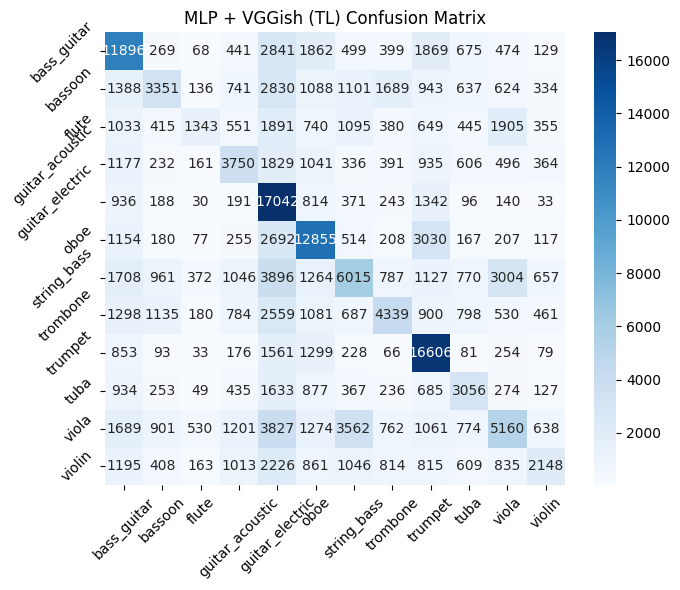

In [22]:
import seaborn as sns

#Evaluate Both Transfer Learning Models
def report_tl(model, X, y, title):
    y_pred = np.argmax(model.predict(X), axis=1)
    y_true = np.argmax(y, axis=1)
    print(f"\n=== {title} ===")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{title} Confusion Matrix")
    plt.xticks(rotation=45); plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

report_tl(cnn_tl, X_tr_c,      y_tr, "1D-CNN + VGGish (TL)")
report_tl(mlp_tl, X_tr,      y_tr, "MLP + VGGish (TL)")



## Analysis 1: Accuracy and Confussion Matrix

From the above results, we observe a marked difference in performance between our two transfer learning models: the MLP + VGGish architecture achieved an overall accuracy of 43%, while the 1D CNN + VGGish model attained a comparatively lower accuracy of 33%. These findings offer a compelling insight into how different model architectures leverage the same pre-trained audio embeddings—VGGish—and how that affects the downstream classification performance in our out-of-tune detection task.

The higher accuracy of the MLP model suggests that the 128-dimensional embeddings produced by VGGish may already encapsulate the most relevant features needed for our classification task, and that further convolutional transformations may not be necessary—or could even be detrimental—when applied to already high-level representations. Since MLPs operate on fully connected layers without spatial bias, they likely preserved the discriminative power of these embeddings, learning global relationships in the latent space more effectively.

In contrast, the performance drop observed in the 1D CNN + VGGish model may reflect an architectural mismatch. The convolutional layers, which are adept at extracting localized patterns in raw or lower-level features (e.g., spectrograms), might be redundant or even counterproductive when applied to VGGish embeddings. These embeddings are already abstracted, and applying convolutions to them could obscure rather than enhance the useful patterns, especially in a task like ours where subtle pitch deviations need to be preserved and amplified for detection.

Our results suggest that for tasks involving VGGish embeddings, MLPs offer a more efficient and effective path forward—especially when our goal is to detect subtle pitch inconsistencies in polyphonic mixtures. 

### Confusion Matrix

Examining the 1D-CNN + VGGish confusion matrix, we observe that certain classes—such as guitar electric and trumpet—are reasonably well classified, but substantial confusion persists among spectrally similar instruments. For instance, bass guitar predictions are frequently misclassified as string bass, and viola samples are misinterpreted as cello or violin, underscoring the model's difficulty in disambiguating timbrally close classes. This class confusion indicates that while the CNN architecture may have captured some generalized pitch patterns, it struggled to differentiate fine-grained differences essential for accurate tuning classification.

In contrast, the MLP + VGGish confusion matrix demonstrates a visibly sharper diagonal dominance, reflecting better class-specific learning. Instruments such as trumpet, guitar electric, and oboe show strong classification accuracy with substantially fewer misclassifications into neighboring instrument classes. While some ambiguity remains for overlapping ranges (e.g., violin vs viola, flute vs oboe), the reduction in off-diagonal dispersion illustrates the MLP’s more precise alignment with the latent space produced by the VGGish embeddings.

Taken together, these confusion matrices reaffirm that while both models benefit from transfer learning, the MLP architecture exhibits greater robustness and reliability in distinguishing instrument classes within complex polyphonic mixtures—a critical advantage for building real-world tuning detection systems.

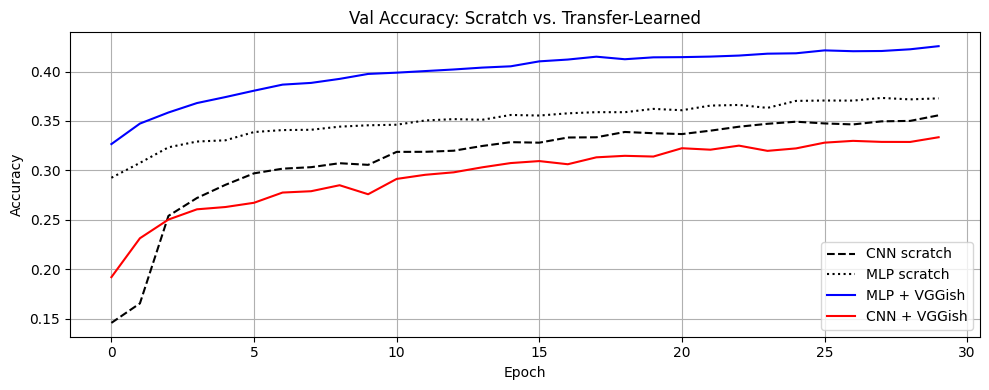

In [23]:
#Plots
plt.figure(figsize=(10,4))
plt.plot(history.history['val_accuracy'],   'k--', label='CNN scratch')
plt.plot(mlp_history.history['val_accuracy'],'k:', label='MLP scratch')
plt.plot(hist_mlp_tl.history['val_accuracy'],'b-', label='MLP + VGGish')
plt.plot(history_tl.history['val_accuracy'],'r-', label='CNN + VGGish')
plt.title("Val Accuracy: Scratch vs. Transfer-Learned")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

## Validation Accuracy comparision of all 4 models:

The line plot offers a clear and informative comparison of the validation accuracy progression across all four model configurations: baseline CNN, baseline MLP, and their respective transfer learning counterparts leveraging VGGish embeddings. This visualization provides strong empirical support for assessing the impact of transfer learning in our out-of-tune instrument detection task.

Across the entire training timeline, the MLP + VGGish model (blue solid line) distinctly outperforms the others, finishing with a validation accuracy of approximately 43%. This consistent superiority across epochs indicates not only a better generalization ability but also suggests that the MLP architecture aligns well with the VGGish embeddings. These embeddings, rich in audio semantics, appear to be best exploited by the dense, fully connected structure of the MLP.

In contrast, the CNN + VGGish model (red line) shows limited improvement, peaking at around 33%. Despite leveraging the same pretrained embeddings, this architecture does not seem to capitalize on them effectively, potentially due to the convolutional layers disrupting the spatial structure of the latent representation. The CNN's performance plateauing early signals architectural incompatibility with the high-level abstraction provided by VGGish.

Interestingly, both baseline models (dashed black for CNN and dotted black for MLP) trail behind the MLP + VGGish model, reaffirming the importance of pretrained audio features. Yet, the baseline MLP continues to outperform the baseline CNN, further suggesting that our data modality—mean-reduced mel-spectrograms—is better suited for models that emphasize global, rather than local, feature learning.

# Initial Conclusion

Our updated findings solidify the earlier conclusion: the MLP + VGGish model continues to be the best-performing architecture across all evaluated configurations. With a validation accuracy reaching 43% and clearer patterns of class separation in the confusion matrix, it demonstrates the most potential for tuning anomaly detection in polyphonic settings. Moreover, even when trained from scratch, the MLP baseline outshined the CNN baseline—highlighting a strong case for favoring dense architectures over convolutional ones in this specific use case.

However, in directly addressing our core research question—whether a transfer-learned model can effectively detect the out-of-tune instrument within a mixture—the current models fall short. While MLP + VGGish provides encouraging signals, none of the models meet the real-world application threshold. For deployment in rehearsal tools or music editing workflows, we would likely require a model with at least 80% accuracy and substantially reduced inter-class confusion. The observed misclassifications and modest accuracy indicate that we are still in the early stages of achieving viable results.

__Comparison to Our Hypothesis__

We hypothesized that transfer learning using VGGish would result in moderate accuracy due to its proven ability to capture meaningful audio representations. This prediction was partially validated. The CNN + VGGish model underperformed at just 33%, suggesting that the convolutional structure may not complement VGGish embeddings effectively. On the other hand, the MLP + VGGish model achieved 43%, which we interpret as moderate accuracy given the complexity of the task. Thus, the hypothesis holds true for MLP but not for CNN, underlining the importance of architecture-selection when applying transfer learning.

__Future Plans__

Looking ahead, we plan to deepen our analysis of the models’ limitations. Specifically, we aim to understand why some instruments are consistently misclassified and which embeddings contribute most to these predictions. Additionally, we will explore data augmentation techniques to improve class balance and diversity. Architectural changes—including attention layers or hybrid CNN-MLP structures—will also be considered to better exploit the latent VGGish space. These improvements will be crucial for pushing model performance toward the real-world applicability standard we aspire to reach.

# UPGRADED BASE MLP MODEL

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import gelu  # Optional, or use ReLU if unavailable

In [25]:
# Reshape input
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp = X_test.reshape(X_test.shape[0], -1)

K.clear_session()

In [26]:
# ===== DEEP RESIDUAL MLP BLOCK =====
input_layer = Input(shape=(64,))

# Block 1
x = Dense(1024)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Block 2
x1 = Dense(512)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.4)(x1)

# Residual block (x1 → x2)
x2 = Dense(512)(x1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.3)(x2)

res1 = Add()([x1, x2])  # Skip connection

# Block 3
x3 = Dense(256)(res1)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.3)(x3)

# Block 4
x4 = Dense(128)(x3)
x4 = BatchNormalization()(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.2)(x4)

# Output
output_layer = Dense(y.shape[1], activation='softmax')(x4)

# Build model
mlp_model = Model(inputs=input_layer, outputs=output_layer)

mlp_model.compile(
    optimizer=Adam(learning_rate=3e-4),  # Slightly higher LR due to BN
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

# ===== CALLBACKS =====
mlp_callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, verbose=1)
]

# ===== TRAIN =====
mlp_history = mlp_model.fit(
    X_train_mlp, y_train,
    validation_data=(X_test_mlp, y_test),
    epochs=50,
    batch_size=32,
    callbacks=mlp_callbacks
)

# ===== EVALUATE =====
y_pred_probs_mlp = mlp_model.predict(X_test_mlp)
y_pred_mlp = np.argmax(y_pred_probs_mlp, axis=1)
y_true_mlp = np.argmax(y_test, axis=1)

print("\nMLP Classification Report:\n", classification_report(y_true_mlp, y_pred_mlp))
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_true_mlp, y_pred_mlp))

# ===== SAVE =====
mlp_model.save("ultra_mlp_out_of_tune_model.h5")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │     66,560 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024)      │      4,096 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024)      │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    524,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512)       │          0 │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]   

 Total params: 1,029,516 (3.93 MB)

 Trainable params: 1,024,652 (3.91 MB)

 Non-trainable params: 4,864 (19.00 KB)

Epoch 1/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.2134 - loss: 2.3124 - val_accuracy: 0.3093 - val_loss: 1.9785 - learning_rate: 3.0000e-04
Epoch 2/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.2944 - loss: 2.0242 - val_accuracy: 0.3153 - val_loss: 1.9315 - learning_rate: 3.0000e-04
Epoch 3/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.3124 - loss: 1.9590 - val_accuracy: 0.3244 - val_loss: 1.9291 - learning_rate: 3.0000e-04
Epoch 4/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.3235 - loss: 1.9181 - val_accuracy: 0.3425 - val_loss: 1.8240 - learning_rate: 3.0000e-04
Epoch 5/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.3302 - loss: 1.8932 - val_accuracy: 0.3622 - val_loss: 1.7876 - learning_rate: 3.0000e-04
Epoch 6/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.3380 - loss: 1.8727 - val_accuracy: 0.3567 - val_loss: 1.7995 - learning_rate: 3.0000e-04
Epoch 7/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 42s 


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.61      0.57      5355
           1       0.45      0.35      0.40      3715
           2       0.41      0.04      0.08      2701
           3       0.40      0.52      0.45      2830
           4       0.63      0.76      0.69      5357
           5       0.49      0.62      0.55      5364
           6       0.43      0.27      0.33      5402
           7       0.44      0.40      0.42      3688
           8       0.46      0.71      0.56      5332
           9       0.60      0.45      0.52      2232
          10       0.42      0.43      0.43      5345
          11       0.43      0.25      0.32      3033

    accuracy                           0.48     50354
   macro avg       0.47      0.45      0.44     50354
weighted avg       0.48      0.48      0.46     50354


MLP Confusion Matrix:
 [[3286  150   11  170  177  361  104  192  495  117  242   50]
 [ 264 1306    9 

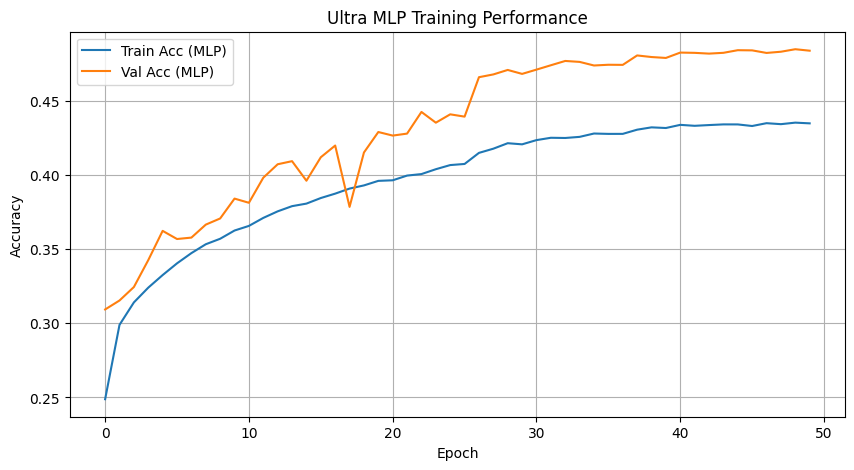

In [27]:
# ===== PLOT =====
plt.figure(figsize=(10,5))
plt.plot(mlp_history.history['accuracy'], label='Train Acc (MLP)')
plt.plot(mlp_history.history['val_accuracy'], label='Val Acc (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Ultra MLP Training Performance')
plt.grid()
plt.show()

# ULTRA MLP + VGGISH

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │    132,096 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024)      │      4,096 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024)      │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    524,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512)       │          0 │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]   

 Total params: 1,095,052 (4.18 MB)

 Trainable params: 1,090,188 (4.16 MB)

 Non-trainable params: 4,864 (19.00 KB)

Epoch 1/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 48s 7ms/step - accuracy: 0.2608 - loss: 2.1990 - val_accuracy: 0.3754 - val_loss: 1.7896 - learning_rate: 3.0000e-04
Epoch 2/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.3467 - loss: 1.8842 - val_accuracy: 0.3938 - val_loss: 1.7124 - learning_rate: 3.0000e-04
Epoch 3/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.3657 - loss: 1.8133 - val_accuracy: 0.4057 - val_loss: 1.6663 - learning_rate: 3.0000e-04
Epoch 4/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.3743 - loss: 1.7804 - val_accuracy: 0.4089 - val_loss: 1.6496 - learning_rate: 3.0000e-04
Epoch 5/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.3837 - loss: 1.7546 - val_accuracy: 0.4208 - val_loss: 1.6174 - learning_rate: 3.0000e-04
Epoch 6/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.3878 - loss: 1.7381 - val_accuracy: 0.4227 - val_loss: 1.6030 - learning_rate: 3.0000e-04
Epoch 7/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 

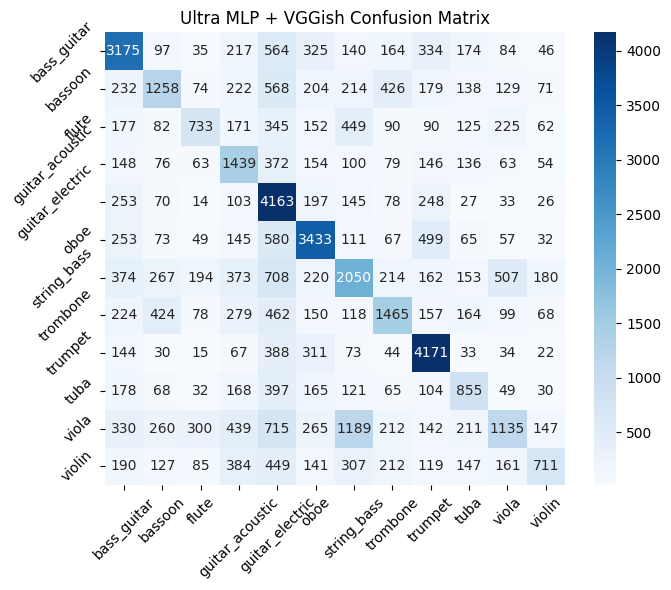

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# ===== STEP 1: Prepare Data =====
X_ultra = X_vgg.astype(np.float32)     # 128-dim VGGish embeddings
y_ultra = y_vgg.astype(np.float32)     # one-hot labels

# ===== STEP 2: Stratified Train/Test Split =====
X_train_ultra, X_test_ultra, y_train_ultra, y_test_ultra = train_test_split(
    X_ultra, y_ultra,
    stratify=np.argmax(y_ultra, axis=1),
    test_size=0.2,
    random_state=42
)

# ===== STEP 3: Flatten for MLP Input =====
X_train_ultra = X_train_ultra.reshape(X_train_ultra.shape[0], -1)
X_test_ultra = X_test_ultra.reshape(X_test_ultra.shape[0], -1)

# ===== STEP 4: Build Ultra MLP with Residuals =====
K.clear_session()
inp = Input(shape=(128,))

x = Dense(1024)(inp)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x1 = Dense(512)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.4)(x1)

x2 = Dense(512)(x1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.3)(x2)

res = Add()([x1, x2])

x3 = Dense(256)(res)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.3)(x3)

x4 = Dense(128)(x3)
x4 = BatchNormalization()(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.2)(x4)

out = Dense(y_train_ultra.shape[1], activation='softmax')(x4)

ultra_mlp = Model(inputs=inp, outputs=out)
ultra_mlp.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ultra_mlp.summary()

# ===== STEP 5: Train =====
ultra_callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, verbose=1)
]

history_ultra = ultra_mlp.fit(
    X_train_ultra, y_train_ultra,
    validation_data=(X_test_ultra, y_test_ultra),
    epochs=50,
    batch_size=32,
    callbacks=ultra_callbacks
)

# ===== STEP 6: Evaluate =====
y_pred_probs = ultra_mlp.predict(X_test_ultra)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_ultra, axis=1)

print("\n=== ULTRA MLP + VGGish ===")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# ===== Confusion Matrix Plot =====
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Ultra MLP + VGGish Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== STEP 7: Save Model =====
ultra_mlp.save("ultra_mlp_vggish_out_of_tune_model.h5")


# ULTIMATE LSTM

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 64, 2)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 64, 512)   │    530,432 │ input[0][0]       │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64, 512)   │      2,048 │ bidirectional[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64, 512)   │  1,574,912 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 512)   │      2,048 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 512)   │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 64, 256)   │    656,384 │ add[0][0]         │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 64, 256)   │        512 │ bidirectional_2[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 128)       │    164,352 │ layer_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128)       │        256 │ bidirectional_3[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │     66,048 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    262,656 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 512)       │      1,024 │ dense_1[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 512)       │          0 │ dropout[0][0],    │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 3,657,740 (13.95 MB)

 Trainable params: 3,655,692 (13.95 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/15
3148/3148 ━━━━━━━━━━━━━━━━━━━━ 2909s 921ms/step - accuracy: 0.1245 - loss: 2.4856 - val_accuracy: 0.2281 - val_loss: 2.2574 - learning_rate: 2.0000e-04
Epoch 2/15
3148/3148 ━━━━━━━━━━━━━━━━━━━━ 2910s 924ms/step - accuracy: 0.2140 - loss: 2.2910 - val_accuracy: 0.2774 - val_loss: 2.1258 - learning_rate: 2.0000e-04
Epoch 3/15
3148/3148 ━━━━━━━━━━━━━━━━━━━━ 2745s 872ms/step - accuracy: 0.2558 - loss: 2.1887 - val_accuracy: 0.2950 - val_loss: 2.0605 - learning_rate: 2.0000e-04
Epoch 4/15
3148/3148 ━━━━━━━━━━━━━━━━━━━━ 2021s 642ms/step - accuracy: 0.2740 - loss: 2.1313 - val_accuracy: 0.3138 - val_loss: 1.9984 - learning_rate: 2.0000e-04
Epoch 5/15
3148/3148 ━━━━━━━━━━━━━━━━━━━━ 1993s 633ms/step - accuracy: 0.2886 - loss: 2.0803 - val_accuracy: 0.3238 - val_loss: 1.9693 - learning_rate: 2.0000e-04
Epoch 6/15
3148/3148 ━━━━━━━━━━━━━━━━━━━━ 1993s 633ms/step - accuracy: 0.2981 - loss: 2.0482 - val_accuracy: 0.3267 - val_loss: 1.9463 - learning_rate: 2.0000e-04
Epoch 7/15
3148/3148 ━


ULTRA LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.41      0.43      5355
           1       0.34      0.10      0.16      3715
           2       0.32      0.04      0.07      2701
           3       0.31      0.24      0.27      2830
           4       0.36      0.72      0.48      5357
           5       0.44      0.51      0.47      5364
           6       0.27      0.24      0.25      5402
           7       0.32      0.24      0.27      3688
           8       0.48      0.69      0.56      5332
           9       0.30      0.23      0.26      2232
          10       0.24      0.32      0.27      5345
          11       0.32      0.08      0.13      3033

    accuracy                           0.36     50354
   macro avg       0.35      0.32      0.30     50354
weighted avg       0.35      0.36      0.33     50354


Confusion Matrix:
 [[2185   40   16  134  791  567  302  166  605  144  367   38]
 [ 265  379   

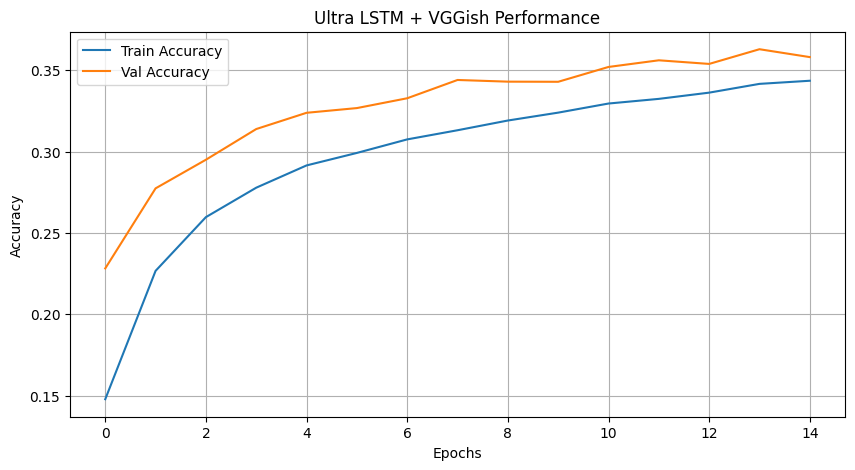

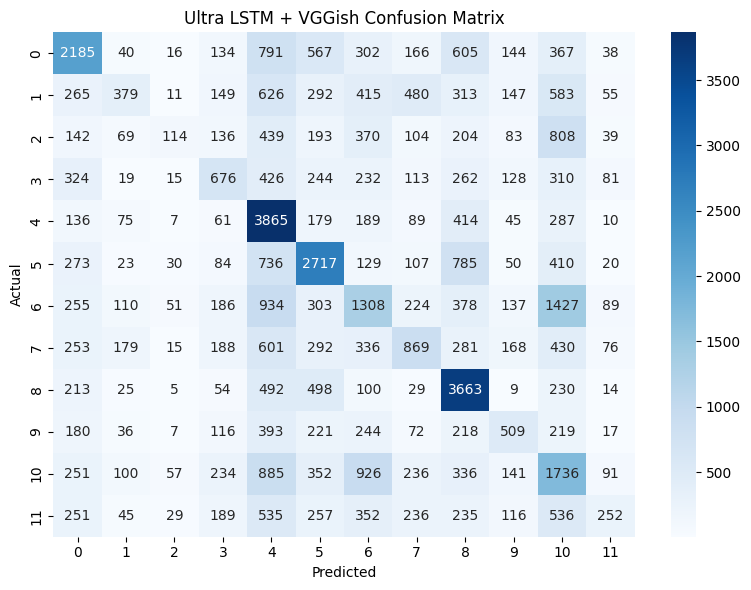

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Add, BatchNormalization, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np

# ====== ✅ RESHAPE VGGish embeddings to (64, 2) ======
X_vgg_lstm = X_vgg.reshape(X_vgg.shape[0], 64, 2)
y_vgg_lstm = y_vgg.astype(np.float32)

# ====== ✅ Train/test split ======
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_vgg_lstm, y_vgg_lstm,
    stratify=np.argmax(y_vgg_lstm, axis=1),
    test_size=0.2,
    random_state=42
)

# =========== ✅ Build ULTRA DEEP LSTM =========== #
K.clear_session()

input_layer = Input(shape=(64, 2), name="input")

# BiLSTM Block 1
x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(input_layer)
x = BatchNormalization()(x)

# BiLSTM Block 2 + Residual
x1 = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(x)
x1 = BatchNormalization()(x1)
x_res = Add()([x, x1])

# BiLSTM Block 3 (Reduction)
x2 = Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(x_res)
x2 = LayerNormalization()(x2)

# BiLSTM Final (no return sequences)
x3 = Bidirectional(LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.2))(x2)
x3 = LayerNormalization()(x3)

# Dense FC Head + Residual Block
fc1 = Dense(512, activation='relu')(x3)
fc1 = Dropout(0.4)(fc1)

fc2 = Dense(512)(fc1)
fc2 = LayerNormalization()(fc2)
fc2 = Dense(512, activation='relu')(fc2)
fc2 = Dropout(0.3)(fc2)

fc_merge = Add()([fc1, fc2])
fc_final = Dense(256, activation='relu')(fc_merge)
fc_final = Dropout(0.3)(fc_final)

# Output
output_layer = Dense(y_train_lstm.shape[1], activation='softmax')(fc_final)

# =========== ✅ Compile Model =========== #
lstm_model = Model(inputs=input_layer, outputs=output_layer)
lstm_model.compile(
    optimizer=Adam(learning_rate=2e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

lstm_model.summary()

# =========== ✅ Callbacks =========== #
lstm_callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.3, verbose=1)
]

# =========== ✅ Train =========== #
lstm_history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=15,
    batch_size=64,
    callbacks=lstm_callbacks,
    verbose=1
)

# =========== ✅ Evaluate =========== #
y_pred_probs_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_probs_lstm, axis=1)
y_true_lstm = np.argmax(y_test_lstm, axis=1)

print("\nULTRA LSTM Classification Report:\n", classification_report(y_true_lstm, y_pred_lstm))
print("\nConfusion Matrix:\n", confusion_matrix(y_true_lstm, y_pred_lstm))

# =========== ✅ Save Model =========== #
lstm_model.save("ultra_lstm_vggish_model.h5")

# =========== ✅ Plot Performance =========== #
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Ultra LSTM + VGGish Performance')
plt.grid()
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true_lstm, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Ultra LSTM + VGGish Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## testing

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Concatenate, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# =========================
# Prepare Data
# =========================
X_cnn = X_ultra[..., np.newaxis]             # CNN branch: (N, 128, 1)
X_mlp = X_ultra.reshape(X_ultra.shape[0], -1)  # MLP branch: (N, 128)

X_cnn_train, X_cnn_test, X_mlp_train, X_mlp_test, y_train, y_test = train_test_split(
    X_cnn, X_mlp, y_ultra,
    stratify=np.argmax(y_ultra, axis=1),
    test_size=0.2,
    random_state=42
)

# =========================
# Build Hybrid CNN + MLP Model
# =========================
K.clear_session()

# CNN Branch
cnn_input = Input(shape=(128, 1), name="cnn_input")
x = Conv1D(128, kernel_size=3, padding='same')(cnn_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.3)(x)

x = Conv1D(256, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling1D()(x)
cnn_output = Dense(256, activation='relu')(x)

# MLP Branch
mlp_input = Input(shape=(128,), name="mlp_input")
m = Dense(1024)(mlp_input)
m = LayerNormalization()(m)
m = Activation('gelu')(m)
m = Dropout(0.5)(m)

m1 = Dense(512)(m)
m1 = BatchNormalization()(m1)
m1 = Activation('relu')(m1)
m1 = Dropout(0.4)(m1)

m2 = Dense(512)(m1)
m2 = BatchNormalization()(m2)
m2 = Activation('relu')(m2)
m2 = Dropout(0.3)(m2)

mlp_res = Add()([m1, m2])
mlp_output = Dense(256, activation='relu')(mlp_res)

# Merge CNN + MLP Branches
merged = Concatenate()([cnn_output, mlp_output])
merged = Dense(512, activation='relu')(merged)
merged = Dropout(0.4)(merged)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.3)(merged)

final_output = Dense(y_train.shape[1], activation='softmax')(merged)

# Compile Model
hybrid_model = Model(inputs=[cnn_input, mlp_input], outputs=final_output)
hybrid_model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hybrid_model.summary()

# =========================
# Train Hybrid Model
# =========================
hybrid_callbacks = [
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.2, verbose=1)
]

history = hybrid_model.fit(
    [X_cnn_train, X_mlp_train], y_train,
    validation_data=([X_cnn_test, X_mlp_test], y_test),
    epochs=80,
    batch_size=32,
    callbacks=hybrid_callbacks,
    verbose=1
)

# =========================
# Evaluate Model
# =========================
y_pred_probs = hybrid_model.predict([X_cnn_test, X_mlp_test])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)).transpose()
print(report_df)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Ultra Hybrid CNN + MLP + VGGish Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Save Model
hybrid_model.save("ultra_hybrid_cnn_mlp_vggish_model.h5")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mlp_input           │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1024)      │    132,096 │ mlp_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_input           │ (None, 128, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 1024)      │      2,048 │ dense_1[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 128, 128)  │        512 │ cnn_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1024)      │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128)  │        512 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1024)      │          0 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    524,800 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 64, 128)   │          0 │ activation[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 128)   │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 64, 256)   │     98,560 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 256)   │      1,024 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 512)       │    262,656 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 64, 256)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,620,492 (6.18 MB)

 Trainable params: 1,617,676 (6.17 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/80
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 122s 19ms/step - accuracy: 0.2534 - loss: 2.1954 - val_accuracy: 0.3521 - val_loss: 1.8702 - learning_rate: 3.0000e-04
Epoch 2/80
3032/6295 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.3314 - loss: 1.9451

KeyboardInterrupt: 